In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahdelshafei","key":"14f5ddafb4294a7aa0668177a33ba201"}'}

In [2]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
! kaggle datasets download -d moltean/fruits

Dataset URL: https://www.kaggle.com/datasets/moltean/fruits
License(s): CC-BY-SA-4.0
 99% 3.44G/3.49G [00:26<00:01, 50.8MB/s]
100% 3.49G/3.49G [00:26<00:00, 143MB/s] 


In [4]:
!unzip fruits.zip

Streaming output truncated to the last 5000 lines.
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_277.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_281.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_285.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_289.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_29.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_33.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_37.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_41.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_45.jpg  
  inflating: fruits-360_original-size/fruits-360-original-size/Validation/Tomato 1/r0_49.j

In [11]:
train_dir="/content/fruits-360_original-size/fruits-360-original-size/Training"
test_dir="/content/fruits-360_original-size/fruits-360-original-size/Test"

In [12]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [13]:
import os
fruits=[]
fruits_image=[]
for i in os.listdir(train_dir):
  for image_filename in os.listdir(os.path.join(train_dir, i)):
    fruits.append(i)
    fruits_image.append(os.path.join(i, image_filename))

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
train_fruits = pd.DataFrame(fruits, columns=["Fruits"])
train_fruits["Fruits Image"] = fruits_image

In [16]:
train_fruits

,Fruits,Fruits Image
0,apple_golden_1,apple_golden_1/r0_208.jpg
1,apple_golden_1,apple_golden_1/r1_50.jpg
2,apple_golden_1,apple_golden_1/r0_0.jpg
3,apple_golden_1,apple_golden_1/r0_204.jpg
4,apple_golden_1,apple_golden_1/r0_178.jpg
...,...,...
29525,apple_hit_1,apple_hit_1/r0_214.jpg
29526,apple_hit_1,apple_hit_1/r0_260.jpg
29527,apple_hit_1,apple_hit_1/r2_64.jpg
29528,apple_hit_1,apple_hit_1/r2_200.jpg


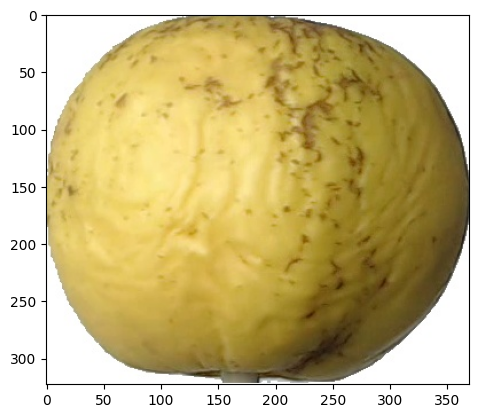

In [17]:
plt.imshow(plt.imread(train_dir + '/' + train_fruits["Fruits Image"][0]))
plt.show()

<h1>YOLO

In [8]:
! pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 27.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 119.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.7/188.7 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [9]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 50.2/112.6 GB disk)


In [18]:
# I will create a dictionary to contain 30 images of the train images
# I will annotate this sample externally on roboflow and then I am going to get it back here
import os
import random
import shutil

sample_dir = "/content/sample_training_images"
os.makedirs(sample_dir, exist_ok=True)

sample_images = train_fruits.sample(n=30, random_state=42)

In [19]:
for index, row in sample_images.iterrows():
    image_name = row["Fruits Image"]
    original_path = os.path.join(train_dir, image_name)
    new_path = os.path.join(sample_dir, os.path.basename(image_name))
    shutil.copyfile(original_path, new_path)

print(f"Copied 30 sample images to {sample_dir}")

Copied 30 sample images to /content/sample_training_images


In [ ]:
# Zipping the folder
zip_path = "/content/sample_training_images.zip"
shutil.make_archive(zip_path.replace(".zip", ""), 'zip', sample_dir)

# Downloading the zip file to your device
files.download(zip_path)

In [6]:
#This is the zipped file that conatins 30 images that I annoted externally on roboflow
!unzip Fruits_detection.v1i.yolov8.zip

Archive:  Fruits_detection.v1i.yolov8.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: train/
   creating: train/images/
 extracting: train/images/r0_116_jpg.rf.f3b3f2e9366b45cbbf6c2e8b675cb7a5.jpg  
 extracting: train/images/r0_146_jpg.rf.0bd964e09855d57e0f64d1e1675f6286.jpg  
 extracting: train/images/r0_168_jpg.rf.e47ecbe283b4b746a651303638fbf9c0.jpg  
 extracting: train/images/r0_16_jpg.rf.93f478c209fb7667bdfe08e2fca8a145.jpg  
 extracting: train/images/r0_208_jpg.rf.aee9259e0f79c2a6131a0450c4e2de6b.jpg  
 extracting: train/images/r0_264_jpg.rf.48e4867b7e55bfd1b2b95f7ad3e8e902.jpg  
 extracting: train/images/r0_26_jpg.rf.204e1ec9a2b6ba8ea132f6cee8128492.jpg  
 extracting: train/images/r0_274_jpg.rf.ec117fdc1b4aa788552dfd398c50f4ba.jpg  
 extracting: train/images/r0_288_jpg.rf.edb1b9505cbdf9118f056d7b0058458c.jpg  
 extracting: train/images/r0_30_jpg.rf.09f2daf82f1b3d8da2637c7f83958112.jpg  
 extractin

#####################################################################################################################################################################################


In [23]:
import yaml
import os

# The path for the images
train_dir_roboflow_images = '/content/train/images'
# We will use the original test directory for the testing
test_dir_original = "/content/fruits-360_original-size/fruits-360-original-size/Test"


roboflow_data_yaml_path = '/content/data.yaml' #The path for the .yaml file created by roboflow
with open(roboflow_data_yaml_path, 'r') as f:
    roboflow_data_config = yaml.safe_load(f) #Loading the file's content in a python dictionary

# Create the dataset configuration to use Roboflow training data and original test data for validation
data_config_custom = {
    'train': train_dir_roboflow_images,  # Path to the training images from Roboflow
    'val': test_dir_original,     # Path to the validation/test dataset (using original test_dir)
    'nc': roboflow_data_config['nc'],  # Number of classes from Roboflow's data.yaml
    'names': roboflow_data_config['names']  # List of class names from Roboflow's data.yaml
}

# path to save the custom yaml file
yaml_file_path_custom = '/content/custom_roboflow_dataset.yaml'

# Get the dictionory content in the customized yaml file
with open(yaml_file_path_custom, 'w') as f:
    yaml.dump(data_config_custom, f)

print(f"Custom dataset configuration file created at: {yaml_file_path_custom}")

Custom dataset configuration file created at: /content/custom_roboflow_dataset.yaml


In [25]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8m.pt')

# Train the model
results = model.train(data=yaml_file_path_custom, epochs=10, patience=5)

Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/custom_roboflow_dataset.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=30, perspective=0.0, plots=True, pose=12.0, p

train: Scanning /content/train/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100%|██████████| 30/30 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1040.8±497.0 MB/s, size: 50.8 KB)


val: Scanning /content/fruits-360_original-size/fruits-360-original-size/Test/Apple 10.cache... 0 images, 14680 backgrounds, 0 corrupt: 100%|██████████| 14680/14680 [00:00<?, ?it/s]


WARNING ⚠️ Labels are missing or empty in /content/fruits-360_original-size/fruits-360-original-size/Test/Apple 10.cache, training may not work correctly. See https://docs.ultralytics.com/datasets for dataset formatting guidance.
Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train3
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instanc

       1/10      10.4G      1.081      6.377      1.558         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 459/459 [02:44<00:00,  2.78it/s]


                   all      14680          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      6.43G       1.16      6.534      1.573         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 459/459 [02:43<00:00,  2.81it/s]


                   all      14680          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      6.43G      1.504      6.976      1.715         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 459/459 [02:43<00:00,  2.82it/s]


                   all      14680          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      6.43G      1.226      6.689      1.589         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 459/459 [03:02<00:00,  2.51it/s]


                   all      14680          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10       6.5G      1.002      5.363      1.602         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 459/459 [03:29<00:00,  2.20it/s]


                   all      14680          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      6.57G     0.7716      4.537      1.399         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 459/459 [05:41<00:00,  1.34it/s]


                   all      14680          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      6.57G     0.3677      3.468      1.176         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 459/459 [04:56<00:00,  1.55it/s]


                   all      14680          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      6.57G     0.4293      3.074      1.261         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 459/459 [04:43<00:00,  1.62it/s]


                   all      14680          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels


/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      6.57G     0.2525      2.644      1.124         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 459/459 [04:35<00:00,  1.66it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


                   all      14680          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      6.57G       0.23      2.692        1.1         14        640: 100%|██████████| 2/2 [00:01<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 459/459 [04:24<00:00,  1.74it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:850: RuntimeWarning: Mean of empty slice.
  i = smooth(f1_curve.mean(0), 0.1).argmax()  # max F1 index
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


                   all      14680          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels

10 epochs completed in 0.678 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 52.0MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics 8.3.179 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 92 layers, 25,845,550 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 459/459 [04:27<00:00,  1.72it/s]
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:668: RuntimeWarning: Mean of empty slice.
  ax.plot(px, py.mean(1), linewidth=3, color="blue", label=f"all classes {ap[:, 0].mean():.3f} mAP@0.5")
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:713: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/_methods.py:130: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/usr/local/lib/python3.11/dist-packages/ultralytics/utils/metrics.py:713: RuntimeWarning: Mean of empty slice.
  y = smooth(py.mean(0), 0.1)
/usr/local/lib/python3.11/dist-packages/numpy/_core/

                   all      14680          0          0          0          0          0
WARNING ⚠️ no labels found in detect set, can not compute metrics without labels
Speed: 0.2ms preprocess, 7.8ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to runs/detect/train3


Successfully loaded model from runs/detect/train3/weights/best.pt
Found 14680 test images.
Selected random test image: /content/fruits-360_original-size/fruits-360-original-size/Test/Apple 13/r1_147.jpg

image 1/1 /content/fruits-360_original-size/fruits-360-original-size/Test/Apple 13/r1_147.jpg: 640x608 1 Apple, 37.3ms
Speed: 4.0ms preprocess, 37.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 608)


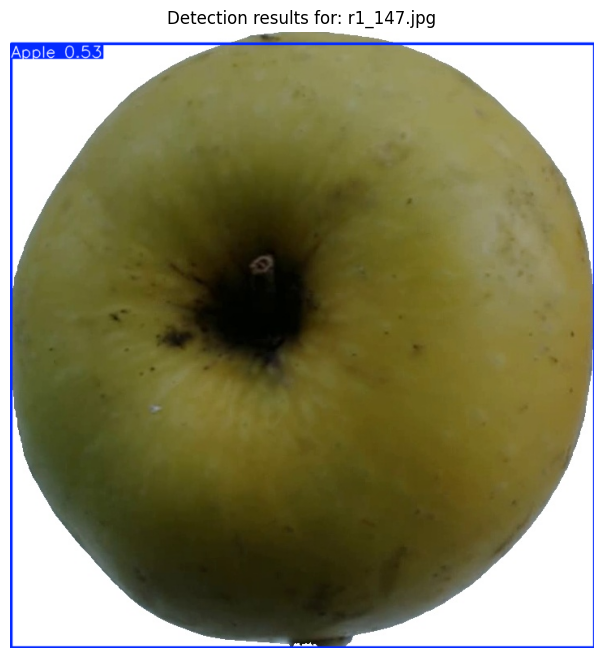

In [42]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from ultralytics import YOLO
from PIL import Image

# Define the directory where the trained model is saved
model_save_dir = 'runs/detect/train3'
model_path = os.path.join(model_save_dir, 'weights', 'best.pt')

# Load the trained model
try:
    model = YOLO(model_path)
    print(f"Successfully loaded model from {model_path}")
except Exception as e:
    print(f"Error loading model: {e}")


# Define the path to the original test images directory
test_base_dir = "/content/fruits-360_original-size/fruits-360-original-size/Test"

# Get a list of all image files in the test directory and its subdirectories
test_image_paths = []
supported_extensions = ['.jpg', '.jpeg', '.png', '.bmp', '.tiff', '.webp'] # Add more extensions if needed

#Walking through all the files in the test directory and storing there full path in test_image_path
for root, _, files in os.walk(test_base_dir):
    for file in files:
        if any(file.lower().endswith(ext) for ext in supported_extensions):
            test_image_paths.append(os.path.join(root, file))

print(f"Found {len(test_image_paths)} test images.")

# Select a random image from the test set
if test_image_paths:
    random_image_path = random.choice(test_image_paths)
    print(f"Selected random test image: {random_image_path}")

    # Applying the predict method on the random image
    results = model.predict(random_image_path)

    # Iterate through the results (there will be one result object for one image)
    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im = Image.fromarray(im_array[..., ::-1])  #Convert BGR → RGB and make it a PIL image for display
        plt.figure(figsize=(8, 8))
        plt.imshow(im)
        plt.axis('off')
        plt.title(f"Detection results for: {os.path.basename(random_image_path)}")
        plt.show()

else:
    print("No test images found in the specified directory.")
